In [1]:
'''
References: 
https://wiki.openstreetmap.org/wiki/Main_Page
https://www.hotosm.org/

The place name should be geocodable which means that the place name should exist in the OpenStreetMap database.
You can do a test search at 
https://www.openstreetmap.org/
https://nominatim.openstreetmap.org/
'''

#Import OSM and MatPlotLib packages
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
# Specify the name that is used to seach for the data
place_name = "kiev"

In [3]:
# Fetch OSM street network from the location

# graph = ox.graph_from_place(place_name)

In [4]:
# Plot the streets

# fig, ax = ox.plot_graph(graph)

In [5]:
# Retrieve nodes and edges

# nodes, edges = ox.graph_to_gdfs(graph)

In [6]:
# print(nodes.head())
# print(edges.head())

In [7]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

# Check data values
area

C:\Users\Machine2\anaconda3\envs\py38-gis-clone\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((30.23615 50.42681, 30.23736 50.42629...",50.590814,50.213242,30.826359,30.236145,324417710,relation,421866,50.402015,30.614815,"Kyiv, Ukraine",boundary,administrative,0.725857


<AxesSubplot:>

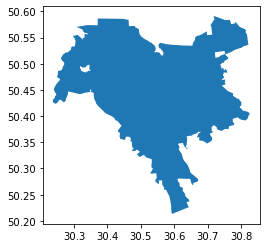

In [8]:
# Plot the area:
area.plot()

In [9]:
# List key-value pairs for tags
tags = {'place': ['city', 'town', 'village', 'hamlet']}

In [10]:
# Retrieve places
places = ox.geometries_from_place(place_name, tags)

# How many places do we have?
len(places)

C:\Users\Machine2\anaconda3\envs\py38-gis-clone\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\Machine2\anaconda3\envs\py38-gis-clone\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\Machine2\anaconda3\envs\py38-gis-clone\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestring

29

In [12]:
# Available columns
places.columns.values

array(['admin_level', 'alt_name', 'alt_name:af', 'alt_name:an',
       'alt_name:ca', 'alt_name:en', 'alt_name:eo', 'alt_name:es',
       'alt_name:et', 'alt_name:fr', 'alt_name:it', 'alt_name:ko',
       'alt_name:pt', 'alt_name:sh', 'alt_name:sv', 'alt_name:tr',
       'alt_name:vi', 'alt_name:vo', 'capital', 'ele', 'katotth',
       'koatuu', 'name', 'name:aan', 'name:ab', 'name:af', 'name:als',
       'name:am', 'name:ang', 'name:ar', 'name:arz', 'name:ast',
       'name:az', 'name:ba', 'name:bar', 'name:bat-smg', 'name:be',
       'name:be-tarask', 'name:bg', 'name:bi', 'name:bn', 'name:bo',
       'name:bpy', 'name:br', 'name:bs', 'name:bxr', 'name:ca',
       'name:cbk-zam', 'name:ckb', 'name:crh', 'name:cs', 'name:csb',
       'name:cu', 'name:cv', 'name:cy', 'name:da', 'name:de', 'name:dsb',
       'name:el', 'name:en', 'name:eo', 'name:es', 'name:et', 'name:eu',
       'name:ext', 'name:fa', 'name:fi', 'name:fiu-vro', 'name:fo',
       'name:fr', 'name:frr', 'name:fy', 'name:

In [13]:
places.head(2)

,,admin_level,alt_name,alt_name:af,alt_name:an,alt_name:ca,alt_name:en,alt_name:eo,alt_name:es,alt_name:et,alt_name:fr,...,flag,name:an,timezone,addr:city,addr:postcode,addr:region,fixme,website,landuse,residential
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
node,26150422,2,Kiëf,Kiëf,Kiev,Kíev,Kiev,Kievo,Kiev,Kõjiv,Kiev,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation,421865,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
columns = ['admin_level','name:en','alt_name', 'alt_name:en', 'name:uk', 'name:ru', 'place', 'capital',
       'population', 'geometry', 'ways', 'boundary', 'type', 'addr:city', 'addr:postcode', 'addr:region']
places[columns].head(10)

admin_level       name:en alt_name alt_name:en  name:uk  \
element_type osmid                                                              
node         26150422           2          Kyiv     Kiëf        Kiev     Київ   
relation     421865             9           NaN      NaN         NaN      NaN   
             421866             4          Kyiv      NaN        Kiev     Київ   
             1754752            9  Kotsiubynske      NaN         NaN      NaN   
             1929810            9       Brovary      NaN         NaN  Бровари   
             2394953            9           NaN      NaN         NaN      NaN   
             2394959            9           NaN      NaN         NaN      NaN   
             2394966            9    Shchaslyve      NaN         NaN  Щасливе   
             2604847            9         Hatne      NaN         NaN      NaN   
             2614178            9      Vyshneve      NaN         NaN  Вишневе   

                           name:ru    place capital population  \
element_type osmid                                               
node         26150422         Киев     city     yes    2909697   
relation     421865       Вышгород     town     NaN        NaN   
             421866           Киев     city     NaN    2908249   
             1754752   Коцюбинское     town     NaN        NaN   
             1929810       Бровары     city     NaN     100623   
             2394953           NaN  village     NaN        NaN   
             2394959    Безугловка  village     NaN        NaN   
             2394966    Счастливое  village     NaN        NaN   
             2604847        Гатное  village     NaN        NaN   
             2614178      Вишнёвое     town     NaN      39094   

                                                                geometry  \
element_type osmid                                                         
node         26150422                          POINT (30.52414 50.45003)   
relation     421865    POLYGON ((30.37704 50.58643, 30.37695 50.59078...   
             421866    POLYGON ((30.23615 50.42681, 30.23630 50.42943...   
             1754752   POLYGON ((30.31838 50.49489, 30.31853 50.49507...   
             1929810   POLYGON ((30.74013 50.49113, 30.74000 50.49142...   
             2394953   POLYGON ((30.82086 50.38596, 30.82056 50.38642...   
             2394959   POLYGON ((30.82406 50.40043, 30.82459 50.40111...   
             2394966   POLYGON ((30.78034 50.38523, 30.78058 50.38544...   
             2604847   POLYGON ((30.36865 50.35379, 30.36871 50.35420...   
             2614178   POLYGON ((30.33107 50.38590, 30.33393 50.38728...   

                                                                    ways  \
element_type osmid                                                         
node         26150422                                                NaN   
relation     421865    [556519076, 919859083, 725194017, 725194015, 7...   
             421866    [1028485964, 265847971, 23491639, 375524149, 3...   
             1754752   [130230039, 130230035, 130230041, 130230034, 4...   
             1929810   [556326439, 182326175, 556332372, 556332376, 1...   
             2394953   [105133712, 1004072198, 179334022, 1029227010,...   
             2394959   [131895725, 179332573, 179332570, 179328188, 1...   
             2394966                             [1029228884, 666864475]   
             2604847   [573099968, 959544145, 959544144, 193417122, 4...   
             2614178   [149489946, 149480235, 616149803, 616149802, 1...   

                             boundary      type    addr:city addr:postcode  \
element_type osmid                                                           
node         26150422             NaN       NaN          NaN           NaN   
relation     421865    administrative  boundary          NaN           NaN   
             421866    administrative  boundary          NaN           NaN   
             1754752   administrative  b